# Data Wrangling Project: WeRateDogs

In [2]:
# import libraries 
import warnings
import requests 
import os
import tweepy
import json
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from textwrap import wrap
%matplotlib inline

# allow full text to be displayed
pd.set_option('display.max_colwidth', None)

# suppress warnings 
warnings.simplefilter('ignore')

## Gather

In [3]:
# load .csv file 
archive = pd.read_csv('twitter-archive-enhanced.csv')

# save tweet ids to list 
tweet_ids = list(archive.tweet_id)

In [61]:
# specify path 
folder_name = r'C:\Users\t_gas\data_wrangling'
if not os.path.exists(folder_name): 
    os.makedirs(folder_name)

# download and save predicted images 
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open("image_predictions.tsv", mode = 'wb') as file: 
    file.write(response.content)

# load .tsv file
images = pd.read_csv('image_predictions.tsv', sep = '\t', encoding = 'utf-8')

In [4]:
# save credentials
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [5]:
# authorize account
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# set class paramters 
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

For this code, I used https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id and https://knowledge.udacity.com/questions/42488 for support. 

In [8]:
# create empty list to store tweet ids with errors 
errors_list = []

with open('tweet_json.txt', 'a', encoding = 'utf8') as outfile:
    for tweet_id in tweet_ids:
        try:
            print(tweet_id)
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except Exception as e:
            code = e.args[0][0]['code']
            error = e.args[0][0]['message']
            errors_list.append({'tweet_id': tweet_id, 'code': code, 'error': error})

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
882268110199369728
882045870035

Rate limit reached. Sleeping for: 603


782598640137187329
782305867769217024
782021823840026624
781955203444699136
781661882474196992
781655249211752448
781524693396357120
781308096455073793
781251288990355457
781163403222056960
780931614150983680
780858289093574656
780800785462489090
780601303617732608
780543529827336192
780496263422808064
780476555013349377
780459368902959104
780192070812196864
780092040432480260
780074436359819264
779834332596887552
779377524342161408
779124354206535695
779123168116150273
779056095788752897
778990705243029504
778774459159379968
778764940568104960
778748913645780993
778650543019483137
778624900596654080
778408200802557953
778396591732486144
778383385161035776
778286810187399168
778039087836069888
778027034220126208
777953400541634568
777885040357281792
777684233540206592
777641927919427584
777621514455814149
777189768882946048
776819012571455488
776813020089548800
776477788987613185
776249906839351296
776218204058357768
776201521193218049
776113305656188928
776088319444877312
775898661951

Rate limit reached. Sleeping for: 638


684800227459624960
684594889858887680
684588130326986752
684567543613382656
684538444857667585
684481074559381504
684460069371654144
684241637099323392
684225744407494656
684222868335505415
684200372118904832
684195085588783105
684188786104872960
684177701129875456
684147889187209216
684122891630342144
684097758874210310
683857920510050305
683852578183077888
683849932751646720
683834909291606017
683828599284170753
683773439333797890
683742671509258241
683515932363329536
683498322573824003
683481228088049664
683462770029932544
683449695444799489
683391852557561860
683357973142474752
683142553609318400
683111407806746624
683098815881154561
683078886620553216
683030066213818368
682962037429899265
682808988178739200
682788441537560576
682750546109968385
682697186228989953
682662431982772225
682638830361513985
682429480204398592
682406705142087680
682393905736888321
682389078323662849
682303737705140231
682259524040966145
682242692827447297
682088079302213632
682059653698686977
682047327939

In [11]:
extra_info = pd.DataFrame(columns=['tweet_id', 'text', 'retweet_count', 'fav_count'])

with open('tweet_json.txt') as f:
    for line in f:
        tweet  = json.loads(line)
        tweet_id = tweet['id_str']
        text = tweet['full_text']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        extra_info = extra_info.append(pd.DataFrame([[tweet_id, text, retweet_count, fav_count]],
                                        columns=['tweet_id', 'text', 'retweet_count', 'fav_count']))

extra_info = extra_info.reset_index(drop=True)

In [23]:
# convert errors dict to dataframe 
errors = pd.DataFrame(errors_list, columns = ['tweet_id', 'code', 'error'])

2499

To avoid having to re-run the loop above, I will now save the dataframes as .csv files to be used in the remainder of the .ipynb notebook.  

In [50]:
# save dataframes to .csv files
extra_info.to_csv(r'extra_info.csv', index=False)
errors.to_csv(r'errors.csv', index=False)

# import saved dataframes 
extra_info = pd.read_csv(r'extra_info.csv')
errors = pd.read_csv(r'errors.csv')

Before assessing my data, I will check the errors dataframe to see why certain tweets were not retrievable by using .value_counts() on the error column. 

In [51]:
errors.error.value_counts()

No status found with that ID.                        24
Sorry, you are not authorized to see this status.     1
Name: error, dtype: int64

It appears that two types of errors occurred. In 24 of the 25 cases, no status was found matching the tweet ID. It's possible that those tweets were deleted or there is a problem with the tweet ID. In the last case, I am not authorized to see the tweet. Perhaps someone set their account to private? Either way, I won't be able to solve these errors on my own. I'll have to remove these tweet IDs from the archive and images dataframes when I clean the data. 

## Assess

To assess the dataframes, I will use a combination of visual and programmatic tools - primarily, .head(), .sample(), .info(), .describe(), .duplicated(), value_counts(), and .unique(). Any quality or tidiness issues will be recorded at the end of this section. 

In [52]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [53]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1463,694669722378485760,NaN,NaN,2016-02-02 23:52:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phil. He's an important dog. Can control the seasons. Magical as hell. 12/10 would let him sign my forehead https://t.co/9mb0P2rjk2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/694669722378485760/photo/1,https://twitter.com/dog_rates/status/694669722378485760/photo/1",12,10,Phil,None,None,None,None
1015,747103485104099331,NaN,NaN,2016-06-26 16:25:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys... I said DOGS with ""shark qualities"" or ""costumes."" Not actual sharks. This did me a real frighten ...11/10 https://t.co/DX1JUHJVN7",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747103485104099331/photo/1,https://twitter.com/dog_rates/status/747103485104099331/photo/1,https://twitter.com/dog_rates/status/747103485104099331/photo/1,https://twitter.com/dog_rates/status/747103485104099331/photo/1",11,10,None,None,None,None,None
1368,702539513671897089,NaN,NaN,2016-02-24 17:04:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Wild Tuscan Poofwiggle. Careful not to startle. Rare tongue slip. One eye magical. 12/10 would def pet https://t.co/4EnShAQjv6,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/702539513671897089/photo/1,https://twitter.com/dog_rates/status/702539513671897089/photo/1,https://twitter.com/dog_rates/status/702539513671897089/photo/1",12,10,a,None,None,None,None
1842,675870721063669760,6.757073e+17,4.196984e+09,2015-12-13 02:51:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",&amp; this is Yoshi. Another world record contender 11/10 (what the hell is happening why are there so many contenders?) https://t.co/QG708dDNH6,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675870721063669760/photo/1,11,10,None,None,None,None,None
911,757597904299253760,NaN,NaN,2016-07-25 15:26:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @jon_hill987: @dog_rates There is a cunningly disguised pupper here mate! 11/10 at least. https://t.co/7boff8zojZ,7.575971e+17,280479778.0,2016-07-25 15:23:28 +0000,"https://twitter.com/jon_hill987/status/757597141099548672/photo/1,https://twitter.com/jon_hill987/status/757597141099548672/photo/1",11,10,None,None,None,pupper,None


In [54]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [55]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [56]:
archive_dupl = archive['tweet_id'].duplicated()
archive[archive_dupl]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [57]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [58]:
archive.name.value_counts().index.tolist()

['None',
 'a',
 'Charlie',
 'Lucy',
 'Oliver',
 'Cooper',
 'Penny',
 'Tucker',
 'Lola',
 'Winston',
 'Bo',
 'Sadie',
 'the',
 'an',
 'Bailey',
 'Toby',
 'Daisy',
 'Buddy',
 'Bella',
 'Jack',
 'Scout',
 'Rusty',
 'Stanley',
 'Jax',
 'Milo',
 'Dave',
 'Koda',
 'Oscar',
 'Leo',
 'Sammy',
 'Louis',
 'Gus',
 'Phil',
 'Sunny',
 'Bentley',
 'very',
 'George',
 'Larry',
 'Oakley',
 'Alfie',
 'Chester',
 'Finn',
 'Bear',
 'Luna',
 'just',
 'Bruce',
 'Derek',
 'Hank',
 'Archie',
 'Moose',
 'Clark',
 'Maddie',
 'Carl',
 'Dexter',
 'Loki',
 'Clarence',
 'Reggie',
 'Maggie',
 'Cassie',
 'Beau',
 'Sampson',
 'Jeffrey',
 'Maximus',
 'Brody',
 'Reginald',
 'Gary',
 'quite',
 'Sophie',
 'Riley',
 'Gerald',
 'Shadow',
 'Ruby',
 'Scooter',
 'Winnie',
 'Duke',
 'Chip',
 'Walter',
 'Boomer',
 'one',
 'Jerry',
 'Peaches',
 'Mia',
 'Wilson',
 'Rory',
 'Kyle',
 'Waffles',
 'Ted',
 'Frankie',
 'Wallace',
 'Calvin',
 'Coco',
 'Otis',
 'Lorenzo',
 'Reese',
 'Gizmo',
 'Wyatt',
 'Earl',
 'Ellie',
 'Zoey',
 'Steven

In [62]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [63]:
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
639,681297372102656000,https://pbs.twimg.com/media/CXR0WJ_W8AMd_O8.jpg,1,Lhasa,0.482401,True,Shih-Tzu,0.113672,True,Pomeranian,0.096229,True
1530,789530877013393408,https://pbs.twimg.com/media/CvT6IV6WEAQhhV5.jpg,3,schipperke,0.363272,True,kelpie,0.197021,True,Norwegian_elkhound,0.151024,True
1018,710117014656950272,https://pbs.twimg.com/media/CdrXp9dWoAAcRfn.jpg,2,toy_poodle,0.802092,True,miniature_poodle,0.111647,True,cocker_spaniel,0.062866,True
1537,790698755171364864,https://pbs.twimg.com/media/CvkgUjbUsAEvo7l.jpg,1,Bernese_mountain_dog,0.996541,True,EntleBucher,0.001057,True,Appenzeller,0.000998,True
1950,863079547188785154,https://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg,1,Lakeland_terrier,0.275242,True,Airedale,0.190569,True,teddy,0.102595,False


In [64]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [65]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [66]:
images_dupl = images['tweet_id'].duplicated()
images[images_dupl]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [67]:
sorted(images.p1.unique())

['Afghan_hound',
 'African_crocodile',
 'African_grey',
 'African_hunting_dog',
 'Airedale',
 'American_Staffordshire_terrier',
 'American_black_bear',
 'Angora',
 'Appenzeller',
 'Arabian_camel',
 'Arctic_fox',
 'Australian_terrier',
 'Bedlington_terrier',
 'Bernese_mountain_dog',
 'Blenheim_spaniel',
 'Border_collie',
 'Border_terrier',
 'Boston_bull',
 'Brabancon_griffon',
 'Brittany_spaniel',
 'Cardigan',
 'Chesapeake_Bay_retriever',
 'Chihuahua',
 'Christmas_stocking',
 'Dandie_Dinmont',
 'Doberman',
 'Egyptian_cat',
 'English_setter',
 'English_springer',
 'EntleBucher',
 'Eskimo_dog',
 'French_bulldog',
 'German_shepherd',
 'German_short-haired_pointer',
 'Gordon_setter',
 'Great_Dane',
 'Great_Pyrenees',
 'Greater_Swiss_Mountain_dog',
 'Ibizan_hound',
 'Irish_setter',
 'Irish_terrier',
 'Irish_water_spaniel',
 'Italian_greyhound',
 'Japanese_spaniel',
 'Labrador_retriever',
 'Lakeland_terrier',
 'Leonberg',
 'Lhasa',
 'Loafer',
 'Madagascar_cat',
 'Maltese_dog',
 'Mexican_hairl

In [68]:
extra_info.head()

,tweet_id,text,retweet_count,fav_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,7739,36372
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",5730,31327
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,3791,23608
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,7905,39674
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",8526,37881


In [69]:
extra_info.sample(5)

,tweet_id,text,retweet_count,fav_count
2078,674008982932058114,This pup is sad bc he didn't get to be the toy car. Also he has shitty money management skills. 10/10 still cute tho https://t.co/PiSXXZjDSJ,339,1164
946,772877495989305348,You need to watch these two doggos argue through a cat door. Both 11/10 https://t.co/qEP31epKEV,3949,8713
2212,671134062904504320,Say hello to Clarence. He's a western Alkaline Pita. Very proud of himself for dismembering his stuffed dog pal 8/10 https://t.co/BHxr9O7wJY,184,722
797,793135492858580992,Your favorite squad is looking extra h*ckin spooky today. 13/10 for all https://t.co/PrgvOyPtDT,2558,6614
64,883360690899218434,Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,3393,21361


In [70]:
extra_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       2499 non-null   int64 
 1   text           2499 non-null   object
 2   retweet_count  2499 non-null   int64 
 3   fav_count      2499 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 78.2+ KB


In [71]:
extra_info.describe()

,tweet_id,retweet_count,fav_count
count,2.499000e+03,2499.000000,2499.000000
mean,7.511229e+17,2931.997999,8817.234094
std,7.434193e+16,4720.238819,13092.658517
min,6.660209e+17,1.000000,0.000000
25%,6.798496e+17,573.500000,1398.500000
50%,7.349123e+17,1428.000000,3599.000000
75%,8.163937e+17,3495.500000,11301.000000
max,8.924206e+17,78230.000000,157016.000000


### Quality 

#### `archive` table
+ NaNs not recognized (doggo, floofer, pupper and pupppo columns)
+ Erroneous datatypes (timestamp)
+ Missing data 
+ Outliers (rating_numerator and rating_denominator columns) 
+ Incorrect entries in name column (e.g. 'one' index #924)
+ Mix of tweets, retweets and replies
+ Not all rankings are for dogs 

#### `images` table
+ Mix of upper- and lowercase string values (p1, p2 and p3 columns)

#### `extra_info` table 
+ Mix of tweets and retweets
+ Not all rankings are for dogs 

### Tidiness 

#### `archive` table
+ Type of dog variable split into four columns (doggo, floofer, pupper and puppo)

#### `extra_info` table 
+ Text column includes dog name and rating variables 
+ Tweet_id, text columns duplicated in `archive` table

#### other 
+ Final merged dataframe of `archive` and `extra_info` tables contains messy data

## Clean 
To clean the data, I will first make copies of the three dataframes. Then I will follow the programmatic data cleaning process, as described in Lesson 4 Part 5. 

In [72]:
archive_clean = archive.copy() 
images_clean = images.copy() 
extra_info_clean = extra_info.copy()

### Define 
+ Convert NaNs to recognizable datatype

### Code 

In [73]:
archive_clean.replace(to_replace='None', value=np.nan, inplace=True)

### Test

In [74]:
# check that nans are recognized 
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

### Define 
+ Convert timestamp column to datetime 

### Code

In [75]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

### Test

In [76]:
# check datatype 
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Define 
+ Create a list of tweet ids where no extra information could be found and drop rows with matchin tweet ids 
+ Merge `archive` and `extra_info` tables after restructuring `extra_info` table 

### Code

In [77]:
# create list of tweet ids 
remove_ids = list(errors.tweet_id)

for ids in remove_ids: 
    archive_clean.drop(archive_clean[archive_clean.tweet_id == ids].index, inplace=True)

### Test

In [78]:
# check that all IDs were removed 
assert archive.shape[0] - archive_clean.shape[0] == len(remove_ids)

### Define 
+ Set all rating_denominator column values to 10
+ Do not change rating_numerator column  

### Code

In [79]:
archive_clean.rating_denominator = 10

### Test

In [80]:
# confirm that all columns values equal 10 
archive_clean.rating_denominator.value_counts()

10    2331
Name: rating_denominator, dtype: int64

### Define
+ Identify all rows where name column value is lowercase and replace with correct name from tweet text

### Code 

In [81]:
# find all rows where name column value is lowercase 
archive_clean.loc[archive_clean.name.str.match(r'(^[a-z][\w]+)', na=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,NaN,NaN,NaN,NaN
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,NaN,NaN,NaN,NaN
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,NaN,NaN,NaN,NaN
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,NaN,NaN,NaN,NaN
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,NaN,NaN,NaN,NaN
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,NaN,NaN,NaN,NaN
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/v/iEggaEOiLO3",13,10,mad,NaN,NaN,pupper,NaN
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,"https://twitter.com/dog_rates/status/703041949650034688/photo/1,https://twitter.com/dog_rates/status/703041949650034688/photo/1",10,10,an,NaN,NaN,NaN,NaN
773,776249906839351296,NaN,NaN,2016-09-15 02:42:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. Pls stop sending in non-canines like this Mongolian grass snake. This is very frust

In [82]:
# create dictionary with corrected values
new_names = {'one' : 'Grace', 'my' : 'Zoey', 'his' : 'Quizno'}

# map dictionary to dataframe column 
archive_clean.name.map(new_names).fillna(archive_clean.name)

# replace all remaining values with NaN
archive_clean.loc[archive_clean.name.str.match(r'(^[a-z][\w]+)', na=False),'name'] = np.nan

# replace name with index #2204 with "Berta"; could not replace this using dictionary 
archive_clean.loc[2204, 'name'] = 'Berta'

After initially testing my results, I found that the regex I used did not pull name column values of "a". I will now check those rows for names, adding the values to a dictionary. Unlike above, the index will serve as the key. 

In [83]:
archive_clean.loc[archive_clean.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,NaN,NaN,pupper,NaN
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1,https://twitter.com/dog_rates/status/792913359805018113/photo/1",13,10,a,NaN,NaN,NaN,NaN
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1",10,10,a,NaN,NaN,NaN,NaN
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/747885874273214464/photo/1,https://twitter.com/dog_rates/status/747885874273214464/photo/1",8,10,a,NaN,NaN,NaN,NaN
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4,10,a,NaN,NaN,NaN,NaN
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/746872823977771008/photo/1,https://twitter.com/dog_rates/status/746872823977771008/photo/1",11,10,a,NaN,NaN,NaN,NaN
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately https://t.co/xOBKCdpzaa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593470234624/photo/1,12,10,a,NaN,NaN,pupper,NaN
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. Thanks you... 11/10 https://t.co/2ATDsgHD4n,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687239008257/photo/1,11,10,a,NaN,NaN,NaN,NaN
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a taco. We only rate dogs. Please only send in dogs. Dogs are wha

In [84]:
# create dictionary with indices and names 
new_a = {1853 : 'Wylie', 1955 : 'Kip', 2034 : 'Jacob', 2066 : 'Rufus', 2116 : 'Spork', 2125 : 'Cherokee',
         2128 : 'Hemry', 2146 : 'Alphred', 2161 : 'Alfredo', 2191 : 'Leroi', 2218 : 'Chuk', 2235 : 'Alfonso', 
        2249 : 'Cheryl', 2255 : 'Jessiga', 2264 : 'Klint', 2273 : 'Kohl', 2287 : 'Daryl', 2304 : 'Pepe', 
        2311 : 'Octaviath', 2314 : 'Johm'}

# replace "a" value with name 
archive_clean.name.update(pd.Series(new_a))

# replace all remaining values with NaN
archive_clean.loc[archive_clean.name == 'a','name'] = np.nan

### Test 

In [85]:
# visually check that no lowercase names remain 
archive_clean.name.value_counts().index.tolist()

['Oliver',
 'Charlie',
 'Cooper',
 'Penny',
 'Lucy',
 'Lola',
 'Tucker',
 'Winston',
 'Bo',
 'Sadie',
 'Bailey',
 'Toby',
 'Daisy',
 'Buddy',
 'Stanley',
 'Koda',
 'Scout',
 'Bella',
 'Jax',
 'Leo',
 'Rusty',
 'Dave',
 'Oscar',
 'Jack',
 'Milo',
 'Larry',
 'Chester',
 'Finn',
 'Bentley',
 'Oakley',
 'Gus',
 'Alfie',
 'Louis',
 'Sunny',
 'George',
 'Maximus',
 'Cassie',
 'Jeffrey',
 'Chip',
 'Ruby',
 'Derek',
 'Gerald',
 'Sophie',
 'Bear',
 'Bruce',
 'Reginald',
 'Clarence',
 'Duke',
 'Maggie',
 'Dexter',
 'Riley',
 'Jerry',
 'Gary',
 'Phil',
 'Archie',
 'Scooter',
 'Shadow',
 'Brody',
 'Hank',
 'Moose',
 'Carl',
 'Beau',
 'Sampson',
 'Maddie',
 'Boomer',
 'Loki',
 'Winnie',
 'Clark',
 'Sebastian',
 'Steven',
 'Louie',
 'Earl',
 'Ellie',
 'Jimothy',
 'Zoey',
 'Peaches',
 'Frankie',
 'Colby',
 'Nala',
 'Waffles',
 'Wallace',
 'Mia',
 'Calvin',
 'Rosie',
 'Samson',
 'Zeke',
 'Arnie',
 'Kyle',
 'Ted',
 'Max',
 'Vincent',
 'Wyatt',
 'Paisley',
 'Lily',
 'Reggie',
 'Malcolm',
 'Walter',
 'Ol

### Define
+ Remove rows with retweets and replies

### Code

In [86]:
# drop rows where in_reply_to_status_id is not null
archive_clean.drop(archive_clean.loc[~archive_clean.in_reply_to_status_id.isnull()].index, inplace=True)

In [87]:
# drop rows where retweet_status_id column is not null 
archive_clean.drop(archive_clean.loc[~archive_clean.retweeted_status_id.isnull()].index, inplace=True)

In [88]:
# drop rows where tweet text begins with "RT"
archive_clean.drop(archive_clean.loc[archive_clean.text.str.startswith('RT')].index, inplace=True)

### Test

In [89]:
# confirm no retweet rows exist in dataframe
assert archive_clean.in_reply_to_status_id.isnull().all()

In [90]:
# confirm no retweet rows exist in dataframe
assert archive_clean.retweeted_status_id.isnull().all()

In [91]:
# should return an empty dataframe
archive_clean.loc[archive_clean.text.str.startswith('RT')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define
+ Identify and remove rankings that are not for dogs using neural network predictions

### Code

In [92]:
# list of tweet_ids where first image prediction is not a dog with minimum 95% confidence level
not_dog = list(images_clean.loc[(images_clean.p1_conf >= 0.95) & (images_clean.p1_dog == False), 
                                'tweet_id']) 

# remove tweet ids
for ids in not_dog: 
    archive_clean.drop(archive_clean[archive_clean.tweet_id == ids].index, inplace=True)

### Test

In [93]:
# should return an empty dataframe
archive_clean.loc[archive_clean.tweet_id.isin(not_dog)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define 
+ Convert all values in p1, p2 and p3 columns to lowercase

### Code 

In [94]:
images_clean.p1 = images_clean.p1.str.lower() 
images_clean.p2 = images_clean.p2.str.lower()
images_clean.p3 = images_clean.p3.str.lower()

### Test

In [95]:
# confirm that all values are lowercase with test column (p1)
sorted(images_clean.p1.unique())

['acorn_squash',
 'afghan_hound',
 'african_crocodile',
 'african_grey',
 'african_hunting_dog',
 'agama',
 'airedale',
 'alp',
 'american_black_bear',
 'american_staffordshire_terrier',
 'angora',
 'appenzeller',
 'arabian_camel',
 'arctic_fox',
 'australian_terrier',
 'axolotl',
 'badger',
 'bakery',
 'bald_eagle',
 'balloon',
 'banana',
 'bannister',
 'barbell',
 'barrow',
 'basenji',
 'basketball',
 'basset',
 'bath_towel',
 'bathtub',
 'beach_wagon',
 'beagle',
 'bearskin',
 'beaver',
 'bedlington_terrier',
 'bee_eater',
 'bernese_mountain_dog',
 'bib',
 'bighorn',
 'binoculars',
 'birdhouse',
 'bison',
 'black-and-tan_coonhound',
 'black-footed_ferret',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'boathouse',
 'bonnet',
 'book_jacket',
 'bookcase',
 'bookshop',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bow',
 'bow_tie',
 'box_turtle',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'brown_bear',
 'bubble',
 'bull_mastiff',
 'bustard'

### Define
+ Remove rows with retweets

### Code

In [96]:
# drop rows where tweet text begins with "RT"
extra_info_clean.drop(extra_info_clean.loc[extra_info_clean.text.str.startswith('RT')].index, inplace=True)

### Test

In [97]:
# should return an empty dataframe
extra_info_clean.loc[extra_info_clean.text.str.startswith('RT')]

,tweet_id,text,retweet_count,fav_count


### Define
+ Melt dataframe so that dog variable appears in one column 

Originally, I converted each dog stage column into a boolean and used the boolean values to map each dog stage to a new column, "dog_stages." When testing my code, however, I discovered that not all of the dog stages were correctly mapped. After further expecting my dataset, I realized that sometimes more than one dog stage was marked as "True". When mapping the values, I used the order: doggo, floofer, pupper, and then puppo. If a row was marked as both 'doggo' and another dog stage value, 'doggo' would be later replaced by a different dog stage. 

I will need to take a different approach to ensure that both values are preserved.

### Code

In [98]:
# remove NaN values from selected columns
archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].fillna("")

# join columns
archive_clean['dog_stages'] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].agg(''.join, axis=1)

### Test

In [99]:
# visually confirm concatenations
archive_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages
754,778764940568104960,NaN,NaN,2016-09-22 01:16:45+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my god it's Narcos but Barkos. 13/10 someone please make this happen\nhttps://t.co/tird9cIlzB,NaN,NaN,NaN,https://m.youtube.com/watch?v=idKxCMsS3FQ&feature=youtu.be,13,10,NaN,,,,,
2107,670465786746662913,NaN,NaN,2015-11-28 04:54:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Silly dog here. Wearing bunny ears. Nice long tail. Unique paws. Not crazy soft but will do. Extremely agile. 7/10 https://t.co/2BnCLtJMxD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670465786746662913/photo/1,7,10,NaN,,,,,
1174,720059472081784833,NaN,NaN,2016-04-13 01:22:10+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charleson. He lost his plunger. Looked everywhere. Can't find it. So sad. 9/10 would comfort https://t.co/pRHX8yn9Yu,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720059472081784833/photo/1,9,10,Charleson,,,,,
128,867774946302451713,NaN,NaN,2017-05-25 16:10:44+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Harold. He's h*ckin cooperative. 13/10 good work Harold https://t.co/ZYg3NZGICa,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/867774946302451713/photo/1,https://twitter.com/dog_rates/status/867774946302451713/photo/1",13,10,Harold,,,,,
1890,674767892831932416,NaN,NaN,2015-12-10 01:49:36+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pup was carefully tossed to make it look like she's riding that horse. I have no words this is fabulous. 12/10 https://t.co/Bob33W4sfD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674767892831932416/photo/1,12,10,NaN,,,,,
1633,684241637099323392,NaN,NaN,2016-01-05 05:14:53+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Obi. He got camera shy. 12/10 https://t.co/feiPiq7z94,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/684241637099323392/photo/1,https://twitter.com/dog_rates/status/684241637099323392/photo/1,https://twitter.com/dog_rates/status/684241637099323392/photo/1",12,10,Obi,,,,,
756,778650543019483137,NaN,NaN,2016-09-21 17:42:10+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Strider. He thinks he's a sorority girl. Already wants to go to NYC for a weekend to say he's ""studied abroad"" 10/10 https://t.co/KYZkPuiC1l",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/778650543019483137/photo/1,https://twitter.com/dog_rates/status/778650543019483137/photo/1,https://twitter.com/dog_rates/status/778650543019483137/photo/1",10,10,Strider,,,,,
1398,699775878809702401,NaN,NaN,2016-02-17 02:02:25+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Fillup. Spaghetti is his main weakness. Also pissed because he's rewarded with cat treats 11/10 it'll be ok pup https://t.co/TEHu55ZQKD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699775878809702401/photo/1,11,10,Fillup,,,,,
865,762316489655476224,NaN,NaN,2016-08-07 15:56:28+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Scout. He specializes in mid-air freeze frames. 11/10 https://t.co/sAHmwRtfSq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762316489655476224/photo/1,11,10,Scout,,,,,
525,809084759137812480,NaN,NaN,2016-12-14 17:16:53+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Wallace. You said you brushed your teeth but he checked your toothbrush and it was bone dry. 11/10 not pup

In [100]:
# total number of original dog stage values
total_stages_org = (archive_clean.doggo.value_counts()[1] + archive_clean.floofer.value_counts()[1] + 
                  archive_clean.pupper.value_counts()[1] + archive_clean.puppo.value_counts()[1])

# total instances where original dog stage value does not match value in new column 
no_match = archive_clean.loc[(archive_clean.doggo != archive_clean.dog_stages) & 
                  (archive_clean.floofer != archive_clean.dog_stages) & 
                  (archive_clean.pupper != archive_clean.dog_stages) & 
                  (archive_clean.puppo != archive_clean.dog_stages)].shape[0]

# total number of dog stage values in new column
total_stages_new = (archive_clean.dog_stages.value_counts()[1] + archive_clean.dog_stages.value_counts()[2] + 
                  archive_clean.dog_stages.value_counts()[3] + archive_clean.dog_stages.value_counts()[5])

# total number of combined dog stag values in new column 
total_stages_comb = (archive_clean.dog_stages.value_counts()[4] + archive_clean.dog_stages.value_counts()[6]
                    + archive_clean.dog_stages.value_counts()[7]) 

# confirm all dog stages were included 
assert (total_stages_org - no_match) == (total_stages_new + total_stages_comb)

In [101]:
# drop unnecessary columns
archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

### Define
+ Extract dog stages and rating variables from "text" column 

### Code

In [102]:
# create list of dog stages 
stages = ['doggo', 'floofer', 'pupper', 'puppo']

# extract dog stages 
extra_info_clean['dog_stages'] = None
extra_info_clean['dog_stages'] = extra_info_clean.text.str.findall(r"|".join(stages)).apply(", ".join)

In [103]:
# extract rating numerator 
extra_info_clean['rating_numerator'] = extra_info_clean.text.str.extract(r'(\d+(?:\.\d+)?)/(\d+(?:\.\d+)?)(?!.*\d+(?:\.\d+)?/\d+(?:\.\d+)?)', expand=True)[0]

# set rating denominator to 10
extra_info_clean['rating_denominator'] = 10 

# convert both ratings to float
extra_info_clean['rating_numerator'] = extra_info_clean['rating_numerator'].astype(float)
extra_info_clean['rating_denominator'] = extra_info_clean['rating_denominator'].astype(float)

### Test

In [104]:
# visually check that all three columns were added correctly 
extra_info_clean.sample(10)

,tweet_id,text,retweet_count,fav_count,dog_stages,rating_numerator,rating_denominator
2285,669972011175813120,Here we see really big dog cuddling smaller dog. Very touching. True friendship. 10/10s would pet both at once https://t.co/A6XnvxHiUQ,149,426,,10.0,10.0
1172,745789745784041472,This is Gus. He didn't win the Powerball. Quite perturbed about it. Still 10/10 would comfort in time of need https://t.co/3wc246LOtu,1072,4049,,10.0,10.0
994,766069199026450432,This is Juno. She can see your future. 12/10 h*ckin mesmerizing af https://t.co/Z69mShifuk,865,4292,,12.0,10.0
1223,739238157791694849,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,57977,115934,doggo,13.0,10.0
1141,748324050481647620,This is Duke. He permanently looks like he just tripped over something. 11/10 https://t.co/1sNtG7GgiO,765,3698,,11.0,10.0
358,854365224396361728,This is Einstein. He's having a really good day. Hopes you are too. H*ckin nifty tongue. 13/10 would snug intensely https://t.co/mdaQhhfpv6,4552,18483,,13.0,10.0
1538,700002074055016451,This is Thumas. He covered himself in nanners for maximum camouflage. It didn't work. I can still see u Thumas. 9/10 https://t.co/x0ZDlNqfb1,1342,3328,,9.0,10.0
1504,703268521220972544,Happy Friday here's a sleepy pupper 12/10 https://t.co/eBcqv9SPkY,547,1974,pupper,12.0,10.0
2378,668171859951755264,This is a Trans Siberian Kellogg named Alfonso. Huge ass eyeballs. Actually Dobby from Harry Potter. 7/10 https://t.co/XpseHBlAAb,186,465,,7.0,10.0
1075,754449512966619136,This is Dex. He can see into your past and future. Mesmerizing af 11/10 https://t.co/0dYI0Cpdge,736,3790,,11.0,10.0


In [105]:
# programmatically check rating datatypes
extra_info_clean.dtypes

tweet_id                int64
text                   object
retweet_count           int64
fav_count               int64
dog_stages             object
rating_numerator      float64
rating_denominator    float64
dtype: object

### Define
+ Merge the retweet_count, fav_count, rating_numerator, rating_denominator, and dog_stage columns from the `extra_info` table to the `archive` table, joining on *tweet id*

### Code

In [106]:
# merge dataframes 
final_clean = pd.merge(archive_clean, extra_info_clean, on='tweet_id')

### Test

In [107]:
# visually check results 
final_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text_x,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator_x,rating_denominator_x,name,dog_stages_x,text_y,retweet_count,fav_count,dog_stages_y,rating_numerator_y,rating_denominator_y
1374,692828166163931137,NaN,NaN,2016-01-28 21:54:41+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This pupper just descended from heaven. 12/10 can probably fly https://t.co/X6X9wM7NuS,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692828166163931137/photo/1,12,10,NaN,pupper,This pupper just descended from heaven. 12/10 can probably fly https://t.co/X6X9wM7NuS,881,2878,pupper,12.0,10.0
1874,671743150407421952,NaN,NaN,2015-12-01 17:30:22+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11,10,Jacob,,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,228,726,,11.0,10.0
1873,671744970634719232,NaN,NaN,2015-12-01 17:37:36+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Very fit horned dog here. Looks powerful. Not phased by wind. Great beard. Big enough to ride? 6/10 would cuddle https://t.co/wwwYO9C9kl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671744970634719232/photo/1,6,10,NaN,,Very fit horned dog here. Looks powerful. Not phased by wind. Great beard. Big enough to ride? 6/10 would cuddle https://t.co/wwwYO9C9kl,733,1309,,6.0,10.0
347,844580511645339650,NaN,NaN,2017-03-22 16:04:20+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He wants to know if you have a moment to talk about washing machine insurance policies. 11/10 would hear him out https://t.co/gAzPqT7uyk,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844580511645339650/photo/1,11,10,Charlie,,This is Charlie. He wants to know if you have a moment to talk about washing machine insurance policies. 11/10 would hear him out https://t.co/gAzPqT7uyk,3111,16428,,11.0,10.0
308,854120357044912130,NaN,NaN,2017-04-17 23:52:16+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Sometimes you guys remind me just how impactful a pupper can be. Cooper will be remembered as a good boy by so many. 14/10 rest easy friend https://t.co/oBL7LEJEzR,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854120357044912130/photo/1,https://twitter.com/dog_rates/status/854120357044912130/photo/1,https://twitter.com/dog_rates/status/854120357044912130/photo/1,https://twitter.com/dog_rates/status/854120357044912130/photo/1",14,10,NaN,pupper,Sometimes you guys remind me just how impactful a pupper can be. Cooper will be remembered as a good boy by so many. 14/10 rest easy friend https://t.co/oBL7LEJEzR,7271,31339,pupper,14.0,10.0


### Define
+ Split merged dataframe into two: tweet_info (timestamp, source and text) and dog_info (ratings and dog stages) 
+ Drop columns unnecessary for analysis (in_reply and retweet status and user IDs)
+ Reconcile differences between dog_stage columns 

### Code

In [108]:
# select columns for new dataframes
tweet_info = final_clean[['tweet_id', 'timestamp', 'source', 'text_x', 'retweet_count', 'fav_count']]
dog_info = final_clean[['tweet_id', 'name', 'dog_stages_x', 'rating_numerator_y', 'rating_denominator_y', 
                        'dog_stages_y']]

# rename columns
tweet_info.rename(columns={'text_x': 'text'}, inplace=True)
dog_info.rename(columns={'rating_numerator_y': 'rating_numerator', 
                         'rating_denominator_y': 'rating_denominator'}, inplace=True)

To reconcile the two dog stage columns, there are four possibilities: 
1. dog_stage_x column is empty and dog_stage_y column contains value 
2. dog_stage_x column contains value and dog_stage_y column is empty 
3. both dog_stage_x and dog_stage_y columns are empty
4. both dog_stage_x and dog_stage_y columns contain same value 
5. both dog_stage_x and dog_stage_y columns contain different values

In the case of one empty column, the column containing a value will be used. In the case of two empty columns, the column will remain empty. In the case of both columns containing the same value, that value will be used. In the final case, where two contradicting values exist, the text will be re-examined to select the best possible value. 

In [109]:
# create column 
dog_info['dog_stages'] = np.nan

# add values 
mask1 = (dog_info.dog_stages_x != dog_info.dog_stages_y) & (dog_info.dog_stages_y == '')
dog_info['dog_stages'][mask1] = dog_info.dog_stages_x

mask2 = (dog_info.dog_stages_x != dog_info.dog_stages_y) & (dog_info.dog_stages_x == '')
dog_info['dog_stages'][mask2] = dog_info.dog_stages_y

mask3 = (dog_info.dog_stages_x == dog_info.dog_stages_y)
dog_info['dog_stages'][mask3] = dog_info.dog_stages_y

In [110]:
# create mask for last condition 
mask4 = dog_info.loc[(dog_info.dog_stages_x != dog_info.dog_stages_y) & (dog_info.dog_stages_x != "") & (dog_info.dog_stages_y != "")]

# save tweet ids to list 
check_ids = list(mask4['tweet_id'])

# view original tweets 
tweet_info.loc[tweet_info['tweet_id'].isin(check_ids)]

,tweet_id,timestamp,source,text,retweet_count,fav_count
291,858843525470990336,2017-05-01 00:40:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,3335,15081
302,855851453814013952,2017-04-22 18:31:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,17407,44576
309,854010172552949760,2017-04-17 16:34:26+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",3066,15911
492,817777686764523521,2017-01-07 16:59:28+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",2747,10948
549,808106460588765185,2016-12-12 00:29:28+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,2265,9004
579,801115127852503040,2016-11-22 17:28:25+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,2165,8288
610,794205286408003585,2016-11-03 15:51:10+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Laika. She was a space pupper. The first space pupper actually. Orbited earth like a h*ckin boss. 14/10 hero af https://t.co/trSjgY3h4g,3404,9452
814,759793422261743616,2016-07-31 16:50:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",1939,6031
869,751583847268179968,2016-07-09 01:08:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,1118,4436
965,741067306818797568,2016-06-10 00:39:48+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,3106,9525


In [111]:
# create index-based dictionary with correct dog stage values 
correct_stage = {148 : 'doggo', 164 : 'puppo', 171 : 'floofer', 438 : 'doggopupper', 463 : 'doggopupper', 
                470 : 'doggo', 503 : 'pupper', 563 : 'doggo', 717 : 'doggopupper', 879 : 'doggopupper', 
                929 : 'doggopupper', 1118 : 'pupperpupper', 1154 : 'pupper', 1181 : 'pupper', 
                1467 : 'pupperpupper', 1601 : 'pupper', 1641 : 'pupper', 1719 : 'pupper'}

# replace values in dataframe 
dog_info.dog_stages.update(pd.Series(correct_stage))

# drop x and y columns 
dog_info.drop(columns=['dog_stages_x', 'dog_stages_y'], inplace=True)

# convert dog stage column to category 
dog_info.dog_stages = dog_info.dog_stages.astype('category')

### Test

In [112]:
tweet_info.shape

(2167, 6)

In [113]:
# visually confirm new dataframes 
tweet_info.sample(10)

,tweet_id,timestamp,source,text,retweet_count,fav_count
1339,695446424020918272,2016-02-05 03:18:42+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We normally don't rate unicorns but this one has 3 ears so it must be super rare. 12/10 majestic af https://t.co/f9qlKiv39T,1810,4401
1178,708711088997666817,2016-03-12 17:47:45+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Smokey. He really likes tennis balls. 11/10 https://t.co/Ah7WlYTUBQ,717,2543
1516,683852578183077888,2016-01-04 03:28:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Say hello to Tiger. He's a penbroke (little dog pun for ya, no need to applaud I know it was good) 10/10 good dog https://t.co/Yei0HzS3JN",345,1937
1297,699036661657767936,2016-02-15 01:05:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",HAPPY V-DAY FROM YOUR FAV PUPPER SQUAD 13/10 for all https://t.co/7u6VnZ1UFe,1200,2612
940,744995568523612160,2016-06-20 20:49:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Abby. She got her face stuck in a glass. Churlish af. 9/10 rookie move puppo https://t.co/2FPb45NXrK,624,2975
1858,672222792075620352,2015-12-03 01:16:17+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cal. He's a Swedish Geriatric Cheddar. Upset because the pope is laughing at his eyebrows. 9/10 https://t.co/EW4MsOrF5O,204,760
1057,724049859469295616,2016-04-24 01:38:33+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kreggory. He just took a look at his student debt. 10/10 can't even comprehend it https://t.co/XTsZTgilnT,1767,4313
1075,719704490224398336,2016-04-12 01:51:36+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Clyde. He's making sure you're having a good train ride. 12/10 great pupper https://t.co/y206kWHAj0,1425,4527
1664,676975532580409345,2015-12-16 04:01:59+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cooper. He doesn't know how cheese works. Likes the way it feels on his face. Cheeky tongue slip. 11/10 https://t.co/j1zczS0lI5,1051,2747
2037,668587383441514497,2015-11-23 00:30:28+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3,1031,1614


In [114]:
dog_info.sample(10)

,tweet_id,name,rating_numerator,rating_denominator,dog_stages
1377,692535307825213440,Amber,10.0,10.0,
571,802600418706604034,Bailey,11.0,10.0,
982,738885046782832640,Charles,11.0,10.0,
721,776201521193218049,O,10.0,10.0,
834,757393109802180609,NaN,10.0,10.0,doggo
2035,668620235289837568,Kallie,10.0,10.0,
1174,708845821941387268,NaN,9.0,10.0,pupper
2102,667188689915760640,NaN,10.0,10.0,
1957,670338931251150849,Butters,10.0,10.0,
662,786363235746385920,Rizzo,13.0,10.0,doggo


In [115]:
# programmatically confirm dog stages datatype 
dog_info.dtypes

tweet_id                 int64
name                    object
rating_numerator       float64
rating_denominator     float64
dog_stages            category
dtype: object

In [116]:
# re-merge dog_info and tweet_info dataframes to save master .csv file 
master = pd.merge(dog_info, tweet_info, on='tweet_id')

# check shape 
master.shape

(2503, 10)

In [117]:
# save cleaned dataframes 
master.to_csv(r'twitter_archive_master.csv', index=False) 
dog_info.to_csv(r'dog_info.csv', index=False)
tweet_info.to_csv(r'tweet_info.csv', index=False)
images_clean.to_csv(r'images.csv', index=False)

# Analysis
To discover interesting insights and create compelling visualizations for my final analysis, the cleaned dataframes require a bit more reshaping. 

I plan to analyze a few key metrics, including: 
+ Development of ratings over time
+ Average rating per dog stage 
+ Average number of shares per post
+ Top ten posts

Before calculating the final ratings to be used in the first two metrics, I will have to divide the tweets containing references to multiple dog stages into two or more separate rows.

In [118]:
# identify relevant tweet ids 
mask5 = dog_info.loc[(dog_info.dog_stages == 'doggopupper') | (dog_info.dog_stages == 'pupperpupper')]

# save ids to list 
multi_stage_ids = list(mask5['tweet_id'])

# view original tweets 
tweet_info.loc[tweet_info['tweet_id'].isin(multi_stage_ids)]

,tweet_id,timestamp,source,text,retweet_count,fav_count
438,827653905312006145,2017-02-03 23:04:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Boots. She doesn't know what to do with treats so she just holds them. Very good girl. 12/10 would give more treats https://t.co/eAA8lratd3,3057,15679
463,822610361945911296,2017-01-21 01:02:48+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending in non-canines like this Very Pettable Dozing Bath Tortoise. We only rate dogs. Only send dogs... 12/10 https://t.co/mcagPeENIh,3011,15055
690,781308096455073793,2016-09-29 01:42:20+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",2604,7292
717,777189768882946048,2016-09-17 16:57:35+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jeffrey. He's being held so he doesn't fly away. 12/10 would set free https://t.co/d3aLyCykn7,4378,14539
879,750383411068534784,2016-07-05 17:38:41+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoe. She was trying to stealthily take a picture of you but you just noticed. 9/10 not so sneaky pupper https://t.co/FfH3o88Vta,1156,4594
929,746542875601690625,2016-06-25 03:17:46+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Here's a golden floofer helping with the groceries. Bed got in way. Still 11/10 helpful af (vid by @categoen) https://t.co/6ZRoZUWFmd,1884,5063
1118,714606013974974464,2016-03-29 00:12:05+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here are two lil cuddly puppers. Both 12/10 would snug like so much https://t.co/zO4eb7C4tG,926,3626
1467,686618349602762752,2016-01-11 18:39:05+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Olivia. She just saw an adult wearing crocs. 11/10 poor pupper. No one should witness such a thing https://t.co/yJVTi1DjJc,1363,3714


In [119]:
# list of series to append 
append_list = [pd.Series([808106460588765185, 'Dexter', 12, 10, 'doggo'], index=dog_info.columns), 
               pd.Series([802265048156610565, np.nan, 11, 10, 'pupper'], index=dog_info.columns), 
               pd.Series([781308096455073793, np.nan, 12, 10, 'doggo'], index=dog_info.columns),
               pd.Series([759793422261743616, 'Lila', 12, 10, 'pupper'], index=dog_info.columns), 
               pd.Series([741067306818797568, np.nan, 12, 10, 'doggo'], index=dog_info.columns), 
               pd.Series([733109485275860992, np.nan, 12, 10, 'pupper'], index=dog_info.columns), 
               pd.Series([707411934438625280, np.nan, 11, 10, 'pupper'], index=dog_info.columns), 
               pd.Series([683462770029932544, np.nan, 8, 10, 'pupper'], index=dog_info.columns)]

In [120]:
# append dataframe using list of series 
dog_info = dog_info.append(append_list, ignore_index=True)

In [121]:
# names to replace 
replace_name = {438 : 'Burke', 717 : 'Maggie'}

In [122]:
# replace values in dataframe 
dog_info.name.update(pd.Series(replace_name))

In [123]:
# stages to replace 
replace_stage = {378 : 'pupper', 438 : 'pupper', 463 : 'doggo', 589 : 'pupper', 717 : 'doggo', 
                 879 : 'pupper', 929 : 'doggo', 1118: 'pupper', 1467: 'pupper'}

In [124]:
# replace values in dataframe
dog_info.dog_stages.update(pd.Series(replace_stage))

In [125]:
# calculate final rating 
dog_info['final_rating'] = (dog_info.rating_numerator / dog_info.rating_denominator) * 100

# remove rows with nan rating 
dog_info.drop(dog_info.loc[dog_info.final_rating.isnull()].index, inplace=True)

## Metric: Dog stage average rating 

In [126]:
# groupby dog stage and calculate average rating 
stage_avg_rating = dog_info.groupby('dog_stages')['final_rating'].mean().reset_index()
stage_avg_rating = stage_avg_rating[1:]

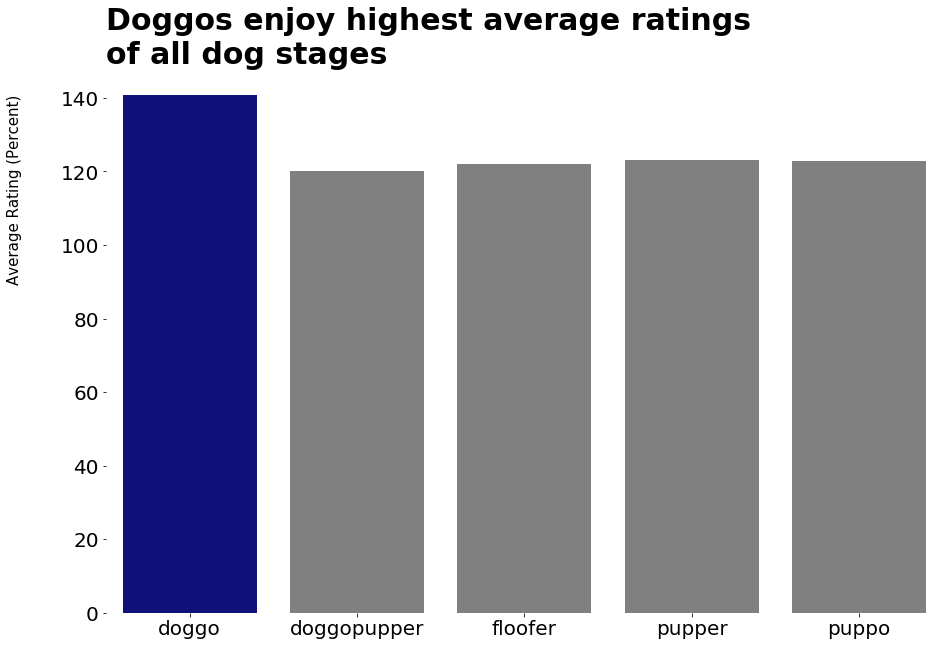

In [127]:
# select font
matplotlib.rcParams['font.family'] = "sans-serif"

# plot bar chart 
fig, ax = plt.subplots(figsize=(15, 10))
labels = np.array(stage_avg_rating.dog_stages)
values = np.array(stage_avg_rating.final_rating) 
clrs = ['grey' if (x < max(values)) else 'darkblue' for x in values]
g = sns.barplot(x = 'dog_stages', y = 'final_rating', data = stage_avg_rating, palette = clrs, ax = ax)
plt.title("Doggos enjoy highest average ratings\n%s" % "\n".join(wrap("of all dog stages", width=60)),
         fontsize = 30, loc = 'left', weight = 'bold') 
plt.xlabel("")
plt.ylabel("Average Rating (Percent)", fontsize = 15)
ax.yaxis.set_label_coords(-0.1,.78)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.patch.set_alpha(0.0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('stage_ratings.png', transparent = True);

## Metric: Development of ratings over time

For this metric, I will need to merge the timestamp column of the tweet_info table with the dog_info table. 

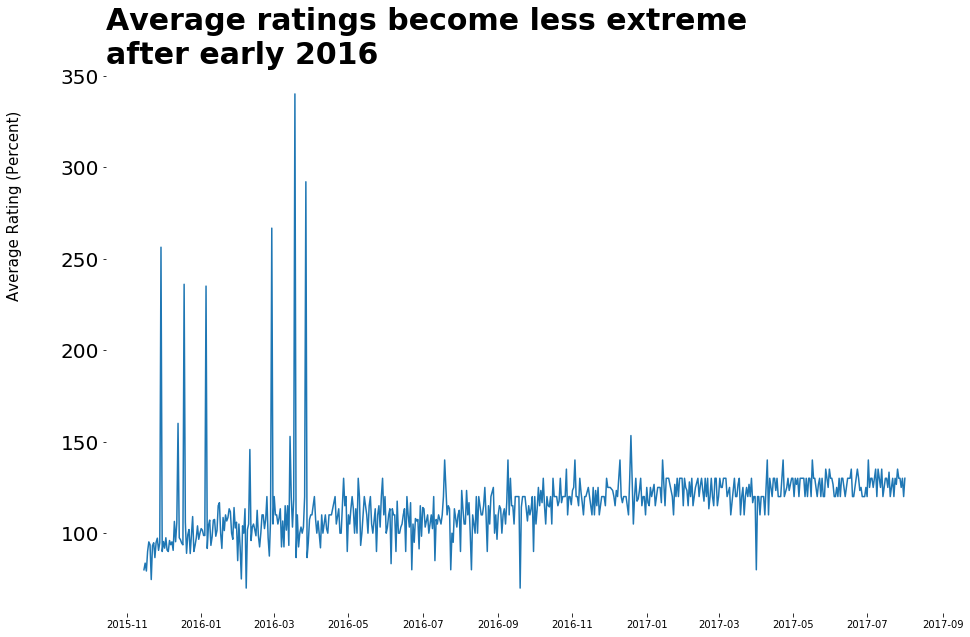

In [128]:
# merge dataframes 
ratings_time = pd.merge(dog_info, tweet_info, on = 'tweet_id', how = 'left')

# select desired columns 
ratings_time = ratings_time[['final_rating', 'timestamp']]

# calculate average ratings by day 
ratings_time = ratings_time.set_index('timestamp').groupby(pd.Grouper(freq='D')).mean()

# drop outliers
ratings_time.drop(ratings_time.loc[ratings_time.final_rating > 400].index, inplace=True)

# plot line chart 
pd.plotting.register_matplotlib_converters()
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data = ratings_time, ax = ax)
plt.title("Average ratings become less extreme\n%s" % "\n".join(wrap("after early 2016", width=60)),
         fontsize = 30, loc = 'left', weight = 'bold') 
plt.xlabel("")
plt.ylabel("Average Rating (Percent)", fontsize = 15)
ax.yaxis.set_label_coords(-0.1,.75)
#plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=20)
ax.patch.set_alpha(0.0)
ax.get_legend().remove()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('avg_ratings.png', transparent = True);

## Metric: Average number of shares per post 

In [129]:
avg_retweet = round(tweet_info.retweet_count.mean(), 0)
print('On average, posts are retweeted {} times.'.format(avg_retweet))

On average, posts are retweeted 2790.0 times.


In [130]:
avg_fav = round(tweet_info.fav_count.mean(), 0)
print('On average, posts are favorited {} times.'.format(avg_fav))

On average, posts are favorited 9825.0 times.


## Metric: Top ten posts 
To measure a post's popularity, two metrics are frequently used: number of retweets and number of times favorited. Although a strong, positive relationship exists between the two variables, as displayed below, the "top ten" list does vary depending on the metric selected. To resolve this issue, the rankings for each metric will be averaged together to create a final "top ten" list. 

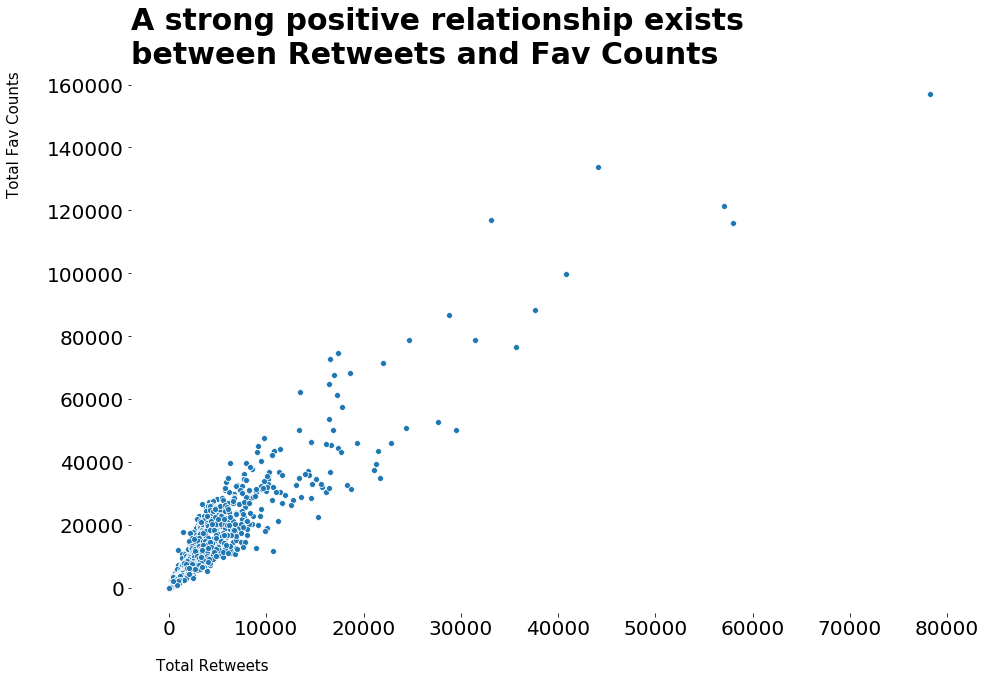

In [131]:
# plot scatter plot
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(x='retweet_count', y='fav_count', data=tweet_info, ax = ax)
plt.title("A strong positive relationship exists\n%s" % "\n".join(wrap("between Retweets and Fav Counts", width=60)),
         fontsize = 30, loc = 'left', weight = 'bold') 
plt.xlabel("Total Retweets", fontsize = 15, horizontalalignment = 'left', x=.03, labelpad = 20)
plt.ylabel("Total Fav Counts", fontsize = 15)
ax.yaxis.set_label_coords(-0.13,.88)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.patch.set_alpha(0.0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('retweet_fav_corr.png', transparent = True);

In [132]:
# rank columns in descending order 
tweet_info['retweet_rank'] = tweet_info['retweet_count'].rank(ascending=0)
tweet_info['fav_rank'] = tweet_info['fav_count'].rank(ascending=0) 

# calculate average rank 
tweet_info['final_rank'] = tweet_info[['retweet_rank', 'fav_rank']].mean(axis=1)

# display top ten results 
top_ten_tweets = tweet_info.sort_values(by='final_rank').head(10)
top_ten_tweets = top_ten_tweets[['tweet_id', 'text', 'retweet_count', 'fav_count', 'final_rank']].reset_index()

# save to .csv file 
top_ten_tweets.to_csv(r'top_ten_tweets.csv', index=False)